# **NEURAL NETWORK**
> In this program file, I will program my neural network, train it using the Fashion-MNIST dataset and test it on the testing dataset.

## **LOADING AND DEFINING**

> This block is to import necessary modules required for our code

In [127]:
!pip install torch torchvision

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader

## **BUILDING THE NEURAL NETWORK MODEL USING NUMPY**

> Here, I will go step by step to build my neural network model using the NumPy module by defining the neurons, then the layers and finally the cost function. For my model, I will use two hidden layers: the first will have 256 neurons, and the second will have 128 neurons.

### NEURAL NETWORK CLASS

In [89]:
class NumpyMLP:
    def __init__(self, input_size, hidden1, hidden2, output_size, lr=0.1):
        np.random.seed(42)
        self.lr = lr
        self.W1 = np.random.randn(input_size, hidden1) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden1))
        self.W2 = np.random.randn(hidden1, hidden2) * np.sqrt(2. / hidden1)
        self.b2 = np.zeros((1, hidden2))
        self.W3 = np.random.randn(hidden2, output_size) * np.sqrt(2. / hidden2)
        self.b3 = np.zeros((1, output_size))
    def relu(self, x):
        return np.maximum(0, x)
    def softmax(self, x):
        exp_x = np.exp(x)
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.probs = self.softmax(self.z3)
        return self.probs
    def relu_backward(self, grad, x):
        grad[x <= 0] = 0
        return grad
    def compute_loss(self, y_true):
        N = y_true.shape[0]
        log_probs = -np.log(self.probs[range(N), y_true] + 1e-9)
        return np.mean(log_probs)
    def backward(self, X, y_true):
        N = X.shape[0]
        dZ3 = self.probs
        dZ3[range(N), y_true] -= 1
        dZ3 /= N
        dW3 = np.dot(self.a2.T, dZ3)
        db3 = np.sum(dZ3, axis=0, keepdims=True)
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = self.relu_backward(dA2.copy(), self.z2)
        dW2 = np.dot(self.a1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = self.relu_backward(dA1.copy(), self.z1)
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
    def accuracy(self, y_true):
        return np.mean(np.argmax(self.probs, axis=1) == y_true)

### TRAINER AND TESTER FUNCTIONS

In [90]:
class Trainer:
    def __init__(self, model, X_train, y_train, batch_size=64, epochs=10):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.batch_size = batch_size
        self.epochs = epochs
        self.history = {'loss': [], 'accuracy': []}
    def train(self):
        for epoch in range(self.epochs):
            indices = np.arange(self.X_train.shape[0])
            np.random.shuffle(indices)
            X_shuffled = self.X_train[indices]
            y_shuffled = self.y_train[indices]
            losses, accs = [], []
            for i in range(0, len(X_shuffled), self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]
                self.model.forward(X_batch)
                loss = self.model.compute_loss(y_batch)
                acc = self.model.accuracy(y_batch)
                self.model.backward(X_batch, y_batch)
                losses.append(loss)
                accs.append(acc)
            avg_loss = np.mean(losses)
            avg_acc = np.mean(accs)
            self.history['loss'].append(avg_loss)
            self.history['accuracy'].append(avg_acc)
            print(f"Epoch {epoch+1}/{self.epochs}: Loss={avg_loss:.4f}, Accuracy={100*avg_acc:.2f}%")
    def get_history(self):
        return self.history

In [91]:
class Tester:
    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test
    def test(self):
        self.model.forward(self.X_test)
        loss = self.model.compute_loss(self.y_test)
        acc = self.model.accuracy(self.y_test)
        print(f"Test Loss: {loss:.4f}, Accuracy: {acc:.4f}")
        return loss, acc
    def plot_training(self, history):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history['loss'], label='Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(history['accuracy'], label='Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Training Accuracy')
        plt.legend()
        plt.tight_layout()
        plt.show()

### MAIN CODE

Epoch 1/20: Loss=0.5647, Accuracy=79.73%
Epoch 2/20: Loss=0.4035, Accuracy=85.31%
Epoch 3/20: Loss=0.3631, Accuracy=86.74%
Epoch 4/20: Loss=0.3355, Accuracy=87.61%
Epoch 5/20: Loss=0.3169, Accuracy=88.42%
Epoch 6/20: Loss=0.2999, Accuracy=88.92%
Epoch 7/20: Loss=0.2864, Accuracy=89.45%
Epoch 8/20: Loss=0.2746, Accuracy=89.85%
Epoch 9/20: Loss=0.2639, Accuracy=90.29%
Epoch 10/20: Loss=0.2554, Accuracy=90.45%
Epoch 11/20: Loss=0.2477, Accuracy=90.83%
Epoch 12/20: Loss=0.2396, Accuracy=91.10%
Epoch 13/20: Loss=0.2311, Accuracy=91.40%
Epoch 14/20: Loss=0.2241, Accuracy=91.68%
Epoch 15/20: Loss=0.2170, Accuracy=91.92%
Epoch 16/20: Loss=0.2095, Accuracy=92.30%
Epoch 17/20: Loss=0.2048, Accuracy=92.31%
Epoch 18/20: Loss=0.1990, Accuracy=92.55%
Epoch 19/20: Loss=0.1927, Accuracy=92.79%
Epoch 20/20: Loss=0.1891, Accuracy=92.95%
Test Loss: 0.2997, Accuracy: 0.8920


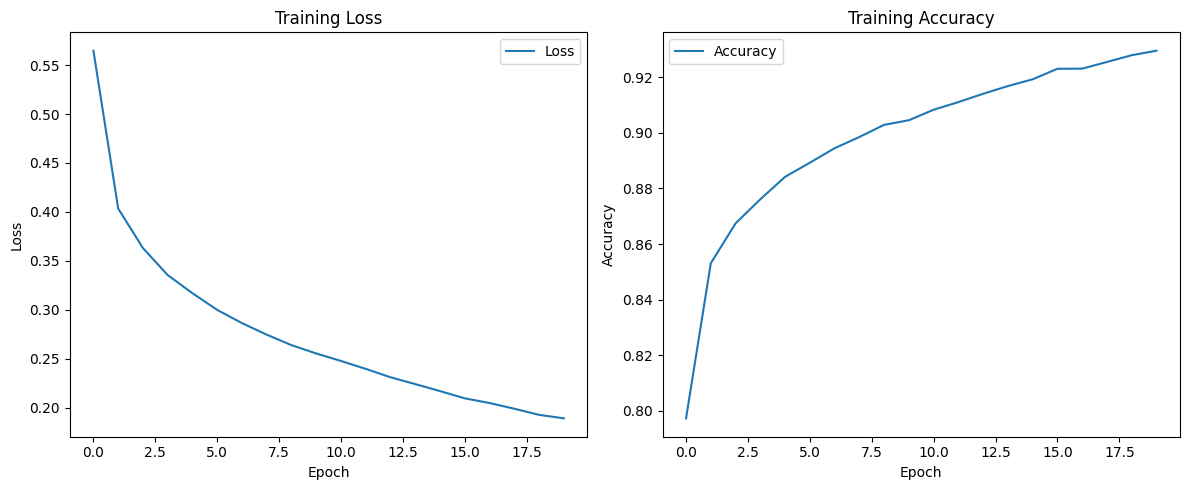

In [92]:
test = pd.read_csv("/content/fashion-mnist_test.csv")
train = pd.read_csv("/content/fashion-mnist_train.csv")
X_train = train.iloc[:, 1:].values.reshape(-1, 28, 28)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_train_flat = X_train_flat / 255.0
y_train = train.iloc[:, 0].values
X_test = test.iloc[:, 1:].values.reshape(-1, 28, 28)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_test = test.iloc[:, 0].values
X_test_flat = X_test_flat / 255.0
model = NumpyMLP(input_size=784, hidden1=256, hidden2=128, output_size=10)
trainer = Trainer(model, X_train_flat, y_train, batch_size=64, epochs=20)
trainer.train()
tester = Tester(model, X_test_flat, y_test)
tester.test()
tester.plot_training(trainer.get_history())

## **BUILDING THE NEURAL NETWORK MODEL USING PYTORCH**

> Here, I will go step by step to build my neural network model using the NumPy module by defining the neurons, then the layers and finally the cost function. For my model, I will use two hidden layers: the first will have 256 neurons, and the second will have 128 neurons.

### NEURAL NETWORK CLASS

In [147]:
class ManualMLP:
    def __init__(self, input_size, hidden1, hidden2, output_size, lr=0.1, dropout_rate=0.2):
        torch.manual_seed(42)
        self.lr = lr
        self.dropout_rate = dropout_rate
        self.training = True
        self.W1 = torch.randn(input_size, hidden1) * (2 / input_size) ** 0.5
        self.b1 = torch.zeros(hidden1)
        self.W2 = torch.randn(hidden1, hidden2) * (2 / hidden1) ** 0.5
        self.b2 = torch.zeros(hidden2)
        self.W3 = torch.randn(hidden2, output_size) * (2 / hidden2) ** 0.5
        self.b3 = torch.zeros(output_size)
        self.m, self.v = {}, {}
        for name, param in self.named_params():
            self.m[name] = torch.zeros_like(param)
            self.v[name] = torch.zeros_like(param)
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.eps = 1e-8
        self.t = 0
    def named_params(self):
        return [('W1', self.W1), ('b1', self.b1),
                ('W2', self.W2), ('b2', self.b2),
                ('W3', self.W3), ('b3', self.b3)]
    def relu(self, x):
        return torch.clamp(x, min=0)
    def relu_backward(self, grad, x):
        return grad * torch.where(x > 0, 1.0, 0.01)
    def dropout(self, x):
        if not self.training:
            return x
        mask = (torch.rand_like(x) > self.dropout_rate).float()
        return mask * x / (1 - self.dropout_rate)
    def softmax(self, x):
        exp_x = torch.exp(x - x.max(dim=1, keepdim=True).values)
        return exp_x / exp_x.sum(dim=1, keepdim=True)
    def forward(self, X):
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = self.relu(self.z2)
        self.z3 = self.a2 @ self.W3 + self.b3
        self.probs = self.softmax(self.z3)
        if torch.isnan(self.probs).any():
            print("NaN in softmax output!")
        return self.probs
    def compute_loss(self, y):
        N = y.shape[0]
        log_probs = -torch.log(self.probs[torch.arange(N), y] + 1e-9)
        return log_probs.mean()
    def backward(self, X, y):
        N = y.shape[0]
        dz3 = self.probs.clone()
        dz3[torch.arange(N), y] -= 1
        dz3 /= N
        dW3 = self.a2.T @ dz3
        db3 = dz3.sum(dim=0)
        da2 = dz3 @ self.W3.T
        dz2 = self.relu_backward(da2, self.z2)
        dW2 = self.a1.T @ dz2
        db2 = dz2.sum(dim=0)
        da1 = dz2 @ self.W2.T
        dz1 = self.relu_backward(da1, self.z1)
        dW1 = X.T @ dz1
        db1 = dz1.sum(dim=0)
        grads = {'W3': dW3, 'b3': db3, 'W2': dW2, 'b2': db2, 'W1': dW1, 'b1': db1}
        self.update_params(grads)
    def update_params(self, grads):
        self.t += 1
        for name, param in self.named_params():
            g = grads[name]
            if torch.isnan(g).any():
                print(f"NaNs in gradient {name}!")
            elif g.norm() > 1e3:
                print(f"Large gradient in {name}: {g.norm():.2f}")
            self.m[name] = self.beta1 * self.m[name] + (1 - self.beta1) * g
            self.v[name] = self.beta2 * self.v[name] + (1 - self.beta2) * (g ** 2)
            m_hat = self.m[name] / (1 - self.beta1 ** self.t)
            v_hat = self.v[name] / (1 - self.beta2 ** self.t)
            param -= self.lr * m_hat / (torch.sqrt(v_hat) + self.eps)
    def accuracy(self, y):
        pred = torch.argmax(self.probs, dim=1)
        return (pred == y).float().mean().item()

### TRAINER AND TESTER FUNCTIONS

In [148]:
class Trainer:
    def __init__(self, model):
        self.model = model
        self.loss_history = []
        self.acc_history = []
    def train(self, train_loader, epochs=200, print_every=10):
        for epoch in range(epochs):
            epoch_loss, epoch_acc, n = 0, 0, 0
            self.model.training = True
            for X_batch, y_batch in train_loader:
                self.model.forward(X_batch)
                loss = self.model.compute_loss(y_batch)
                if epoch == 0 and n == 0:
                    print("Sample logits (z3):", self.model.z3[0])
                    print("Sample probs:", self.model.probs[0])
                    print("True label:", y_batch[0].item())
                    print("Sample loss:", loss.item())
                acc = self.model.accuracy(y_batch)
                self.model.backward(X_batch, y_batch)
                batch_size = X_batch.size(0)
                epoch_loss += loss.item() * batch_size
                epoch_acc += acc * batch_size
                n += batch_size
            avg_loss = epoch_loss / n
            avg_acc = epoch_acc / n
            self.loss_history.append(avg_loss)
            self.acc_history.append(avg_acc)
            if epoch % 50 == 0 and epoch != 0:
                self.model.lr *= 0.5
            if epoch % print_every == 0:
                print(f"Epoch {epoch}: Loss = {avg_loss:.4f}, Accuracy = {100 * avg_acc:.2f}%")

In [149]:
class Tester:
    def __init__(self, model, trainer):
        self.model = model
        self.trainer = trainer
    def test(self, X, y):
        self.model.training = False
        with torch.no_grad():
            self.model.forward(X)
            loss = self.model.compute_loss(y)
            acc = self.model.accuracy(y)
        print(f"Test Loss = {loss:.4f}, Test Accuracy = {100 * acc:.2f}%")
    def plot(self):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(self.trainer.loss_history, label="Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training Loss")
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(self.trainer.acc_history, label="Accuracy", color='orange')
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.title("Training Accuracy")
        plt.legend()
        plt.tight_layout()
        plt.show()

### MAIN CODE

Sample logits (z3): tensor([-0.5927,  1.1502, -1.2342,  0.1870, -1.2292,  0.6609, -0.6166, -1.6554,
        -1.5180,  0.6722])
Sample probs: tensor([0.0534, 0.3053, 0.0281, 0.1165, 0.0283, 0.1872, 0.0522, 0.0185, 0.0212,
        0.1893])
True label: 6
Sample loss: 3.2633230686187744
Epoch 0: Loss = 0.4479, Accuracy = 83.89%
Epoch 10: Loss = 0.1514, Accuracy = 94.33%
Epoch 20: Loss = 0.0813, Accuracy = 97.01%
Epoch 30: Loss = 0.0570, Accuracy = 98.07%
Epoch 40: Loss = 0.0451, Accuracy = 98.44%
Test Loss = 0.7144, Test Accuracy = 89.44%


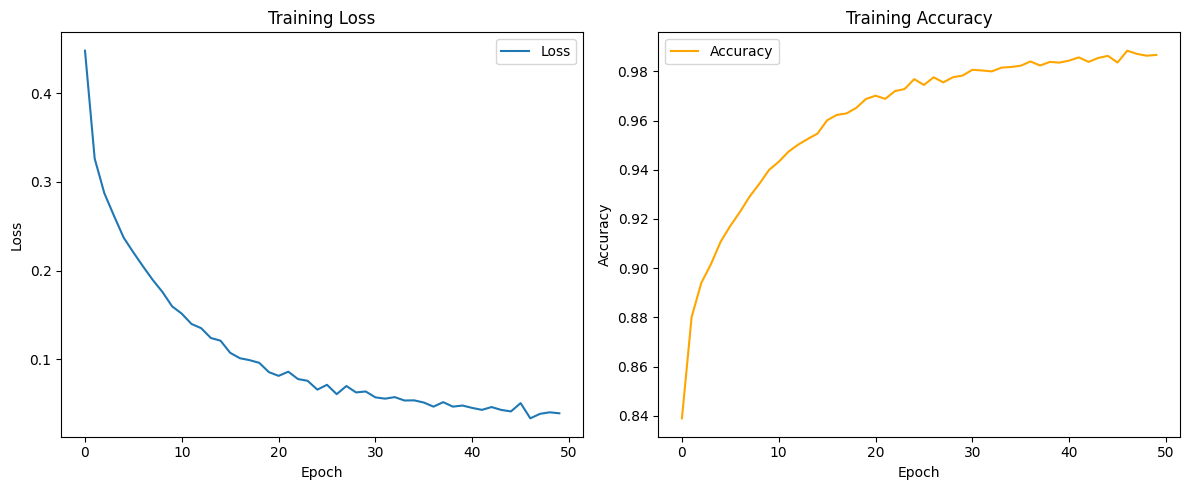

In [150]:
train = pd.read_csv("/content/fashion-mnist_train.csv")
test = pd.read_csv("/content/fashion-mnist_test.csv")
X_train_np = train.iloc[:, 1:].values / 255.0
X_test_np = test.iloc[:, 1:].values / 255.0
mean = X_train_np.mean(axis=0, keepdims=True)
std = X_train_np.std(axis=0, keepdims=True) + 1e-6
X_train_np = (X_train_np - mean) / std
X_test_np = (X_test_np - mean) / std
X_train = torch.tensor(X_train_np, dtype=torch.float32)
y_train = torch.tensor(train.iloc[:, 0].values, dtype=torch.long)
X_test = torch.tensor(X_test_np, dtype=torch.float32)
y_test = torch.tensor(test.iloc[:, 0].values, dtype=torch.long)
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
model = ManualMLP(784, 256, 128, 10, lr=0.001, dropout_rate=0.2)
trainer = Trainer(model)
tester = Tester(model, trainer)
trainer.train(train_loader, epochs=50)
tester.test(X_test, y_test)
tester.plot()